## Final Project Submission

Please fill out:
* Student name: DENNIS MATHU KIMANI
* Student pace: self paced / part time / full time FULL TIME
* Scheduled project review date/time: 15TH SEPTEMEBER 2023 
* Instructor name: SAMUEL KARU
* Blog post URL:


In [3]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


# TAKING A LOOK AT THE DATA INSIDE THE TABLES

After importing the neccesary libraries, I proceed to open the imdb sqlite database to have a look at the tables within them and most importantly, the data inside the tables.
Once we have a good idea of the data we are dealinf with, I will proceed to the analysis step.  

## Querying the Movie Basics Table
Checking the data inside the Movie Basics table of the IMDB Database

In [4]:
#Establishing a connection to the imdb sqlite database
connection = sqlite3.connect (".\zippedData\im.db")
cursor = connection.cursor()

#querying the Movie Basics Table 
movie_basics_query = """ 
SELECT *
FROM movie_basics
"""
cursor.execute(movie_basics_query)
cursor.fetchall()

#transforming the data from the query into a dataframe so as it is presented in a clean tabular format
movie_basics_df = pd.read_sql(movie_basics_query,connection)

movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Querying the Movie Ratings table
Checking the data inside the Movie Ratings table within the IMDB Database

In [5]:
#querying the Movie Ratings Table 
movie_ratings_query = """ 
SELECT *
FROM movie_ratings
"""
cursor.execute(movie_ratings_query)
cursor.fetchall()

#transforming the data from the query into a dataframe so as it is presented in a clean tabular format
movie_ratings_df = pd.read_sql(movie_ratings_query,connection)

movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Most voted movies
Getting the movies with the most number of votes. This will show the movies which received the most number of votes which will effectively show the movies that attrcted the most viewer engangement in votes.

In [6]:
most_voted_query = """SELECT * 
               FROM movie_ratings
               ORDER BY numvotes
               DESC 
               LIMIT 20
               """
cursor.execute(most_voted_query)
cursor.fetchall()

most_voted_movies_df = pd.read_sql(most_voted_query, connection)
most_voted_movies_df

,movie_id,averagerating,numvotes
0,tt1375666,8.8,1841066
1,tt1345836,8.4,1387769
2,tt0816692,8.6,1299334
3,tt1853728,8.4,1211405
4,tt0848228,8.1,1183655
5,tt0993846,8.2,1035358
6,tt1130884,8.1,1005960
7,tt2015381,8.1,948394
8,tt1431045,8.0,820847
9,tt1392170,7.2,795227


## Getting the genres of the most voted movies
I merged the Movies Basics table with the Movie Ratings table with their Movie IDs to get the genres of the most voted movies.



In [10]:
merge_movies_df = movie_basics_df.merge(most_voted_movies_df, on='movie_id')
#merge_movies_df

most_voted_movie_basics_df = merge_movies_df.nlargest(20, 'numvotes')
most_voted_movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
10,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
9,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
15,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
3,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
6,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
16,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
13,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
11,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227


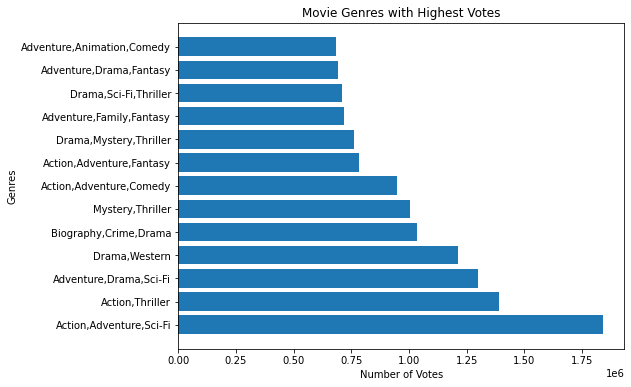

In [23]:
#Plotting horizontal graph showing the relation between movie genres and number of votes
plt.figure(figsize=(8, 6))

plt.barh( most_voted_movie_basics_df['genres'], most_voted_movie_basics_df['numvotes'])


plt.xlabel('Number of Votes')
plt.ylabel('Genres')
plt.title('Movie Genres with Highest Votes')
plt.show()


# RECOMMENDATION 1

After doing the merge, the resulting table and bar graph clearly show that:  
**15 out of the top 20** most voted movies are in the **Action and Aventure Genres**.  
**4 out of 7** movies that got more than 1 million votes are in the **Action and Aventure Genres**.

Based on this analysis, I recommend the Microsoft Team to focus on this two genres in the movies they want to produce in order to achieve maximum impact among voting viewers.
  


## Getting genres of the movies with highest rating
Below, I merged the Movie Basics table dataframe with the Movie Ratings table dataframe to get the genres of the top 20 movies with the highest rating 

In [11]:
merge_movies_ratings_df = movie_basics_df.merge(most_voted_movies_df, on='movie_id')
#merge_movies_df

highest_movie_ratings_df = merge_movies_df.nlargest(20, 'averagerating')
highest_movie_ratings_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
10,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
9,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
15,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
0,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
6,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
7,tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,"Adventure,Drama,Fantasy",8.1,691835
12,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",8.1,780910
3,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655


In [12]:
highest_movie_ratings_df ['adventure_count'] = highest_movie_ratings_df['genres'].str.count('Adventure')
genre_count = highest_movie_ratings_df['adventure_count'].sum() 
print (f"The adventure genre appears {genre_count} times in the merge above")



The adventure genre appears 14 times in the merge above


# RECOMMENDATION 2
The resulting merge above shows that:  
**14 out 20** movies with the highest ratings from viewers are in the **Adventure Genre**  
**10 out of 15** movies that have above the rating of 8.0 are in the **Action and Adventure Genres**  
**4 out of 7** movies that achieved both over 8.0 rating and over 1 million votes are in the **Action and Adventure Genres**   

Based on the insights above, I recommend that the Microsoft team focuses on the **Action and Adventure Genres** in their movie production since those two genres are not only the **most voted** but also receive the **highest rating** as shown in the graph below


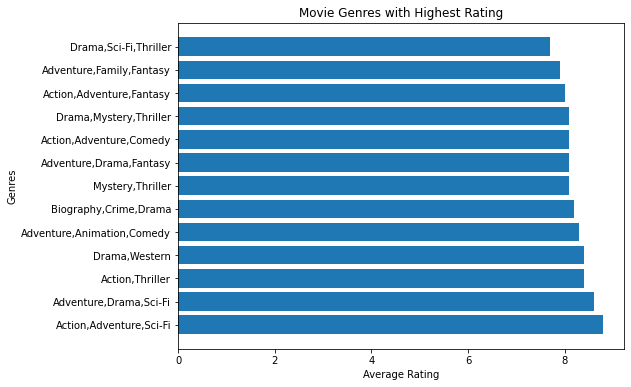

In [22]:
#Plotting bar horizontal graph showing the relation between movie genres and average ratings
plt.figure(figsize=(8, 6))

plt.barh( highest_movie_ratings_df['genres'], highest_movie_ratings_df['averagerating'])


plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Movie Genres with Highest Rating')
plt.show()



# BOM Movie Gross Database
Opening the database to analyse the data within its tables

In [53]:
import pandas as pd
bom_file_path = ("bom.movie_gross.csv.gz")
bom_movies_df = pd.read_csv(bom_file_path, compression='gzip')
bom_movies_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [51]:
## Checking number of null entries
null_entries = bom_movies_df.isnull().sum()
null_entries

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

## Incomplete data in Foreign Gross Column
Due to a very high number of entries, 1350 out of 3387, in the Foreign Gross column having NaN values, it was best if the analysis was focused on the Domestic Gross column data. Only 28 entries in the Domestic Gross column have null values.

In [73]:

'''domestic_gross_sorted_df = bom_movies_df.sort_values(by='domestic_gross', ascending=False)
domestic_gross_sorted_df.head(20)'''

domestic_gross_highest_df = bom_movies_df.sort_values(by='domestic_gross', ascending=False).head(20)
domestic_gross_highest_df

,title,studio,domestic_gross,foreign_gross,year,studio_count
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,1.0
3080,Black Panther,BV,700100000.0,646900000,2018,1.0
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,1.0
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015,0.0
727,Marvel's The Avengers,BV,623400000.0,895500000,2012,1.0
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017,1.0
3082,Incredibles 2,BV,608600000.0,634200000,2018,1.0
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,1.0
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017,1.0
2324,Finding Dory,BV,486300000.0,542300000,2016,1.0


In [77]:
# BV appears many times in the table above
domestic_gross_highest_df ['studio_count1'] = domestic_gross_highest_df['studio'].str.count('BV')
studio_count1 = domestic_gross_highest_df['studio_count1'].head(20).sum() 
print (f"The BV studio appears {studio_count} times in the Highest Domestic Gross Movies")


The BV studio appears 106.0 times in the Highest Domestic Gross Movies


## Plotting a bar graph showing the relation between Domestic Gross and Movie Studios

The graph will show a clear picture of the best performing studiosin the domestic movie market

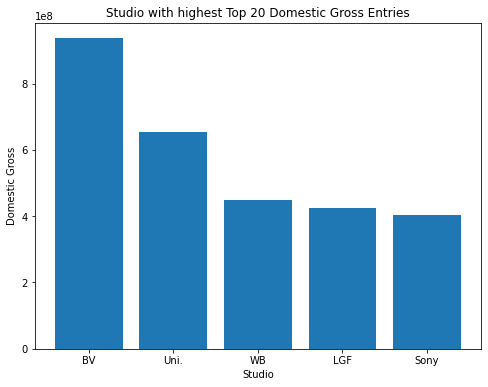

In [76]:
#Plotting a bar graph showing the relation between Domestic Gross and Movie Studio
plt.figure(figsize=(8, 6))

#str_domestic_gross = str(domestic_gross_sorted_df['domestic_gross'])

plt.bar( domestic_gross_highest_df['studio'], domestic_gross_highest_df['domestic_gross'])


plt.xlabel('Studio')
plt.ylabel('Domestic Gross')
plt.title('Studio with highest Top 20 Domestic Gross Entries')
plt.show()

# RECOMMENDATION 3

From BOM database, we were able to see the top 20 best perfoming movies in the domestic market. From the resulting table and graph it is clear that:  
**BV Studio** has the highest number of best grossing movies domestically.  
**13 out of 20** best grossing movies domestically come from **BV Studio**  
Based on this analysis I recommend the Microsoft Team to consider a collaboration with BV Studio to achieve the best domestic gross return  